# Regressão Linear: Conceitos e Demonstração Passo a Passo

Neste notebook vamos aprender como a regressão linear funciona, desde a criação dos dados até o treinamento do modelo. Você verá:

- **O Modelo:** A equação da regressão linear simples:
  
  \[
  y = \theta_0 + \theta_1 x
  \]

- **A Função de Custo:** Utilizamos o Erro Médio Quadrático (MSE) para medir o erro do modelo:
  
  \[
  J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left(\theta_0 + \theta_1 x^{(i)} - y^{(i)}\right)^2
  \]

- **Treinamento com Scikit-Learn:** Ajustaremos o modelo automaticamente.
- **Implementação Manual (Gradiente Descendente):** Para entender como os parâmetros são otimizados.

# Instruções:

### 1. Varie a variável "m" para obter quantidades diferentes de amostras e observe no gráfico
### 2. Varie as constantes da matriz "y" e observe no gráfico
### 3. Analise as diferenças no gráfico "fitado". O que acontece com valores altos e baixos de "m"? O que acontece com valores diferentes para gerar a matriz "y"?
### 4. Como o custo varia em função de "m" e "y"?
### 5. Varie os valores de "n_iterations" e "learning_rate". Como isso afeta a convergência do custo? E como isso afeta o novo modelo, y_novo_gd (Gradiente Descendente Manual)?
### 



In [25]:
# Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Configurar o matplotlib para exibir os gráficos inline (no Jupyter)
%matplotlib inline

# Gerar dados sintéticos para regressão linear simples
# Equação usada: y = 4 + 3x + ruído
np.random.seed(42)  # Para reprodutibilidade
m = 100  # Número de amostras

# Gerando os valores de x entre 0 e 2
X = 2 * np.random.rand(m, 1)

# Gerando os valores de y com ruído
y = 4 + 3 * X + np.random.randn(m, 1)

# Exibir as primeiras linhas dos dados (opcional)
print("Exemplo dos dados gerados (X e y):")
print(X[:5])
print(y[:5])


Exemplo dos dados gerados (X e y):
[[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]]
[[6.33428778]
 [9.40527849]
 [8.48372443]
 [5.60438199]
 [4.71643995]]


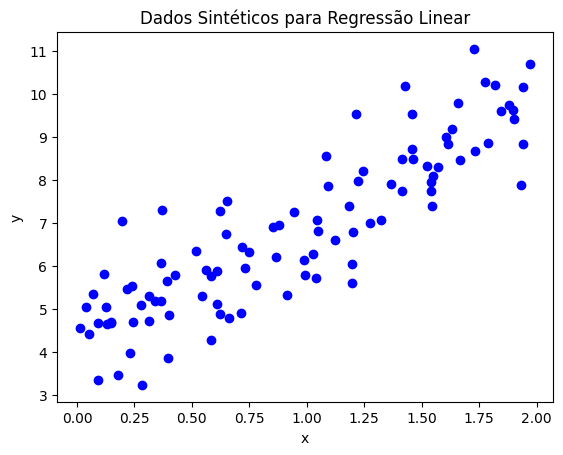

In [26]:
# Visualizar os dados sintéticos
plt.scatter(X, y, color='blue', marker='o')
plt.title("Dados Sintéticos para Regressão Linear")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## Treinamento do Modelo com Scikit-Learn

Utilizaremos a biblioteca `scikit-learn` para treinar um modelo de regressão linear.  
O modelo ajusta a reta que melhor se adequa aos dados minimizando o erro (MSE).  
Após o treinamento, vamos visualizar a reta ajustada e imprimir os valores dos parâmetros:
- **Intercepto (θ₀)**
- **Coeficiente (θ₁)**


Intercepto (θ₀): 4.174780258493103
Coeficiente (θ₁): 2.9226074184723254


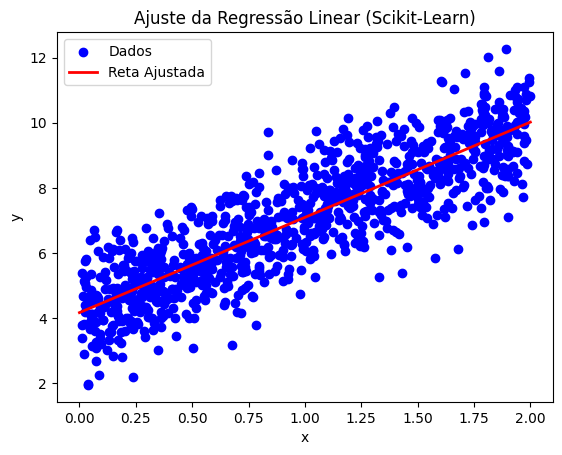

In [17]:
# Criar e treinar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, y)

# Obter os parâmetros do modelo
theta0 = modelo.intercept_[0]  # Intercepto
theta1 = modelo.coef_[0][0]      # Coeficiente (slope)
print("Intercepto (θ₀):", theta0)
print("Coeficiente (θ₁):", theta1)

# Gerar pontos para desenhar a reta ajustada
X_novo = np.array([[0], [2]])
y_pred = modelo.predict(X_novo)

# Plotar os dados e a reta de regressão
plt.scatter(X, y, color='blue', marker='o', label='Dados')
plt.plot(X_novo, y_pred, color='red', linewidth=2, label='Reta Ajustada')
plt.title("Ajuste da Regressão Linear (Scikit-Learn)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


## Função de Custo (MSE)

Para entender como o modelo é ajustado, vamos analisar a função de custo, que mede o erro do modelo:
  
\[
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left(\theta_0 + \theta_1 x^{(i)} - y^{(i)}\right)^2
\]

Essa função nos informa o quão distante estão as predições dos valores reais. Nosso objetivo é encontrar os valores de \(\theta_0\) e \(\theta_1\) que minimizam \(J\).


In [18]:
def compute_cost(theta0, theta1, X, y):
    """
    Calcula o custo (Erro Médio Quadrático - MSE) para os parâmetros theta0 e theta1.
    
    Parâmetros:
      theta0: Valor do intercepto (θ₀)
      theta1: Valor do coeficiente (θ₁)
      X: Dados de entrada (shape: (m, 1))
      y: Dados alvo (shape: (m, 1))
      
    Retorna:
      Custo (valor escalar)
    """
    m = len(y)
    predictions = theta0 + theta1 * X  # Predições: h(x) = θ₀ + θ₁x
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

# Teste da função de custo com os parâmetros obtidos via scikit-learn
cost = compute_cost(theta0, theta1, X, y)
print("Custo (MSE) com os parâmetros obtidos:", cost)


Custo (MSE) com os parâmetros obtidos: 0.4874839408897289


## Gradiente Descendente: Otimizando os Parâmetros

O **gradiente descendente** é um algoritmo de otimização usado para encontrar os valores de \(\theta_0\) e \(\theta_1\) que minimizam a função de custo.

A ideia básica é:
1. **Inicializar** os parâmetros com valores aleatórios.
2. **Calcular** o gradiente (as derivadas parciais de \(J\) em relação a \(\theta_0\) e \(\theta_1\)).
3. **Atualizar** os parâmetros na direção oposta ao gradiente.
4. Repetir até que o custo converja (não mude mais significativamente).

Vamos implementar uma versão simples do gradiente descendente.


Parâmetros obtidos pelo gradiente descendente:
θ₀ = 3.662402009737998
θ₁ = 3.1723825333433857


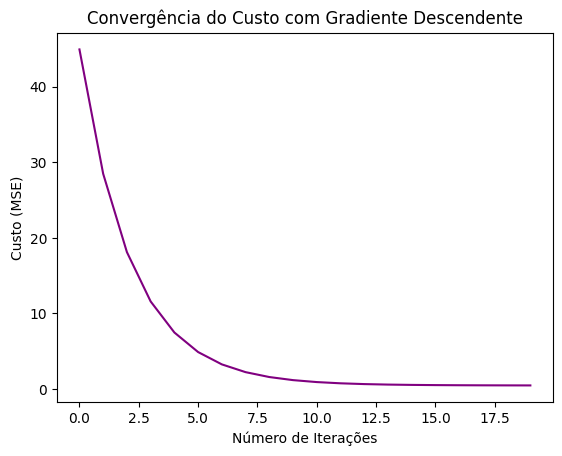

In [39]:
# Parâmetros do Gradiente Descendente
learning_rate = 0.1  # Taxa de aprendizado (experimente valores menores ou maiores)
n_iterations = 20 # Número de iterações
m = len(y)         # Número de amostras

# Inicializar os parâmetros theta0 e theta1 com valores aleatórios
theta0_gd = np.random.randn()
theta1_gd = np.random.randn()

# Lista para armazenar o custo a cada iteração (para visualizar a convergência)
cost_history = []

# Loop do gradiente descendente
for i in range(n_iterations):
    # Calcular as predições com os parâmetros atuais
    predictions = theta0_gd + theta1_gd * X
    
    # Calcular os erros
    errors = predictions - y
    
    # Calcular os gradientes (derivadas parciais)
    gradient_theta0 = (1 / m) * np.sum(errors)
    gradient_theta1 = (1 / m) * np.sum(errors * X)
    
    # Atualizar os parâmetros
    theta0_gd = theta0_gd - learning_rate * gradient_theta0
    theta1_gd = theta1_gd - learning_rate * gradient_theta1
    
    # Calcular e armazenar o custo atual
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    cost_history.append(cost)

# Mostrar os parâmetros obtidos pelo gradiente descendente
print("Parâmetros obtidos pelo gradiente descendente:")
print("θ₀ =", theta0_gd)
print("θ₁ =", theta1_gd)

# Visualizar a convergência do custo
plt.plot(range(n_iterations), cost_history, color='purple')
plt.title("Convergência do Custo com Gradiente Descendente")
plt.xlabel("Número de Iterações")
plt.ylabel("Custo (MSE)")
plt.show()


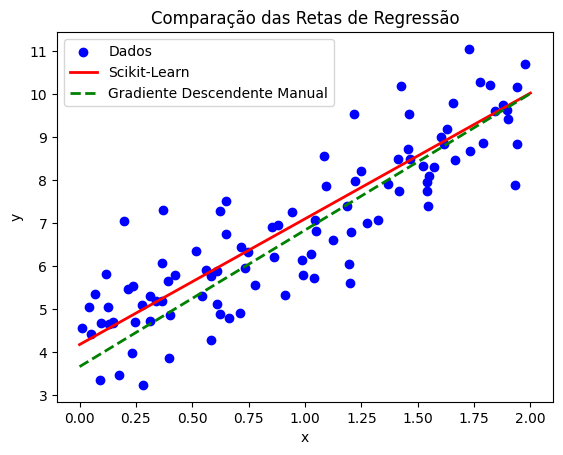

In [40]:
# Gerar pontos para desenhar a reta obtida pelo gradiente descendente
X_novo = np.array([[0], [2]])
y_novo_gd = theta0_gd + theta1_gd * X_novo

# Plotar os dados e ambas as retas (scikit-learn e gradiente descendente)
plt.scatter(X, y, color='blue', marker='o', label='Dados')
plt.plot(X_novo, y_pred, color='red', linewidth=2, label='Scikit-Learn')
plt.plot(X_novo, y_novo_gd, color='green', linestyle='--', linewidth=2, label='Gradiente Descendente Manual')
plt.title("Comparação das Retas de Regressão")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


## Conclusão

Neste notebook, você aprendeu:

1. **Criação dos Dados:** Geramos um conjunto de dados sintéticos com a equação \( y = 4 + 3x + \text{ruído} \).
2. **Treinamento com Scikit-Learn:** Ajustamos um modelo de regressão linear e visualizamos a reta ajustada.
3. **Função de Custo (MSE):** Entendemos como medir o erro do modelo.
4. **Gradiente Descendente:** Implementamos manualmente o algoritmo de gradiente descendente para otimizar os parâmetros e visualizamos a convergência do custo.

**Pontos para Experimentação:**
- Alterar a **taxa de aprendizado** e o **número de iterações** no gradiente descendente.
- Modificar os **valores de ruído** e o **número de amostras** para ver como isso afeta a reta de regressão.
- Comparar os parâmetros obtidos pelo gradiente descendente com os do scikit-learn.

Continue explorando e ajustando os parâmetros para consolidar seu entendimento sobre regressão linear!
